In [1]:
import pandas as pd
import os
from plotnine import ggplot, aes, geom_point, geom_line, scale_x_datetime
from mizani.breaks import date_breaks

In [2]:
os.getcwd()

'/Users/joyce00'

In [3]:
os.chdir('/Documents/MSIS/Fall 2020/Team Project')

In [4]:
file1 = open('Dataset//yelp_academic_dataset_covid_features.json',"r") 
i = 0
business_id = ''
CovidBanner = ''
TemporaryClosedUntil = ''
df = pd.DataFrame(columns = ['business_id', 'CovidBanner', 'TemporaryClosedUntil']) 

line = file1.readline()
while line:
    
    if i % 10000 == 0:
        print(type(line))
        print(line)
        print(i)
    i+=1
    try:
        business_id = line.split('","highlights":')[0].split('"business_id":"')[1]
        CovidBanner = line.split('","Temporary Closed Until":')[0].split(',"Covid Banner":"')[1]
        TemporaryClosedUntil = line.split('","Virtual Services Offered":')[0].split(',"Temporary Closed Until":"')[1]
    
        df = df.append({'business_id' : business_id, 'CovidBanner' : CovidBanner, 'TemporaryClosedUntil' : TemporaryClosedUntil},  
                    ignore_index = True)
        
    except:
        print('error')
        print(i)
        print(line)
        
    line = file1.readline()
file1.close()
df.to_csv('YelpCovid.csv', index=False)

<class 'str'>
{"business_id":"9kXRUIkwdDtnAPO6tVo51g","highlights":"FALSE","delivery or takeout":"FALSE","Grubhub enabled":"FALSE","Call To Action enabled":"FALSE","Request a Quote Enabled":"FALSE","Covid Banner":"FALSE","Temporary Closed Until":"FALSE","Virtual Services Offered":"FALSE"}

0
<class 'str'>
{"business_id":"2i961eidnmAsntgJBpqCpA","highlights":"FALSE","delivery or takeout":"TRUE","Grubhub enabled":"FALSE","Call To Action enabled":"FALSE","Request a Quote Enabled":"FALSE","Covid Banner":"FALSE","Temporary Closed Until":"FALSE","Virtual Services Offered":"FALSE"}

10000
<class 'str'>
{"business_id":"eDwCj42vbugC8lSG1XOMpQ","highlights":"FALSE","delivery or takeout":"TRUE","Grubhub enabled":"FALSE","Call To Action enabled":"FALSE","Request a Quote Enabled":"FALSE","Covid Banner":"FALSE","Temporary Closed Until":"FALSE","Virtual Services Offered":"FALSE"}

20000
<class 'str'>
{"business_id":"SmizR7MLt-558FJJQRBBoQ","highlights":"FALSE","delivery or takeout":"FALSE","Grubhub e

In [45]:
yelpCovid = pd.read_csv('YelpCovid.csv')

In [46]:
fields = ['Start week', 'State', 'COVID-19 Deaths']
deathCDC = pd.read_csv('Dataset//Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv', usecols=fields)  

In [47]:
deathCDC.head(10)

,Start week,State,COVID-19 Deaths
0,02/01/2020,United States,0.0
1,02/08/2020,United States,1.0
2,02/15/2020,United States,0.0
3,02/22/2020,United States,4.0
4,02/29/2020,United States,10.0
5,03/07/2020,United States,36.0
6,03/14/2020,United States,56.0
7,03/21/2020,United States,573.0
8,03/28/2020,United States,3169.0
9,04/04/2020,United States,10043.0


In [60]:
#deathCDC['COVID-19 Deaths'].unique
#deathCDC[deathCDC['COVID-19 Deaths'].isnull()==True]
deathCDC = deathCDC.dropna()
deathCDC = deathCDC.rename(columns = {"Start week":"week"}) 
deathCDC = deathCDC.rename(columns = {"COVID-19 Deaths":"death"}) 


In [102]:
deathCDC.dtypes

week      object
State     object
death    float64
dtype: object

In [104]:
#deathCDC['week'] = pd.to_datetime(deathCDC['week'], format='mm/dd/yyyy') 
deathCDC.astype({'week': 'datetime64[ns]'}).dtypes
deathCDC.astype({'death': 'int'}).dtypes

week     object
State    object
death     int64
dtype: object

In [105]:
deathCDC.head()

,week,State,death
0,02/01/2020,United States,0.0
1,02/08/2020,United States,1.0
2,02/15/2020,United States,0.0
3,02/22/2020,United States,4.0
4,02/29/2020,United States,10.0


In [103]:
deathCDC.to_csv('deathCDC.csv', index=False)

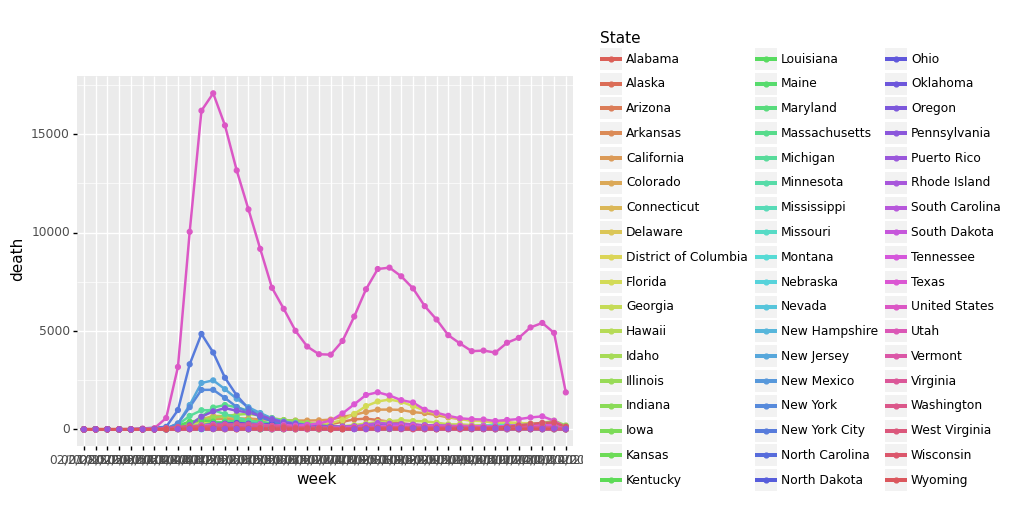

<ggplot: (-9223372036545302875)>

In [106]:
ggplot(deathCDC,aes(x='week', y='death', group='State', color = 'State'))   \
+ geom_line(size=1.0)+geom_point() 

In [10]:
fields = ['submission_date', 'state', 'tot_cases', 'new_case','tot_death', 'new_death']
casesCDC = pd.read_csv('Dataset//United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv', usecols=fields)  

In [11]:
casesCDC.head()

,submission_date,state,tot_cases,new_case,tot_death,new_death
0,01/22/2020,CO,0,0,0,0
1,01/23/2020,CO,0,0,0,0
2,01/24/2020,CO,0,0,0,0
3,01/25/2020,CO,0,0,0,0
4,01/26/2020,CO,0,0,0,0


In [12]:
caseCDC = casesCDC.astype({'submission_date': 'datetime64[ns]'})   \
                   .astype({'tot_cases': 'int'})   \
                   .astype({'new_case': 'int'})   \
                   .astype({'tot_death': 'int'})   \
                   .astype({'tot_death': 'int'})

In [13]:
caseCDC.to_csv('caseCDC.csv', index=False)

In [15]:


#Business Search      URL -- 'https://api.yelp.com/v3/businesses/search'
#Business Match       URL -- 'https://api.yelp.com/v3/businesses/matches'
#Phone Search         URL -- 'https://api.yelp.com/v3/businesses/search/phone'
#Business Details     URL -- 'https://api.yelp.com/v3/businesses/{id}'
#Business Reviews     URL -- 'https://api.yelp.com/v3/businesses/{id}/reviews'
#Businesses, Total, Region

# Import the modules
import requests
import json

# Define a business ID
#business_id = '4AErMBEoNzbk7Q8g45kKaQ'
business_id = ''
unix_time = 1546047836

# Define my API Key, My Endpoint, and My Header
API_KEY = '_h1ZDN4fbjYfpsC7rKWg7WwPMvGK6zbX5nqFTfBCs0IxMFJCpm-DXtQ_xLn3y5a9DXLNBxF-6r-FvzQmpem9eXhlWuRo2UrppIpdlhDAruH6MasgoehjK0nqvO66X3Yx'
ENDPOINT = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(business_id)

#API_KEY is your key copied from Yelp account: new App

HEADERS = {'Authorization': 'bearer %s' % API_KEY}

# Define my parameters of the search
# BUSINESS SEARCH PARAMETERS - EXAMPLE
#PARAMETERS = {'term': 'food',
#              'limit': 50,
#              'offset': 50,
#              'radius': 10000,
#             'location': 'Pittsburgh'}

# BUSINESS MATCH PARAMETERS - EXAMPLE
#PARAMETERS = {'name': 'Peets Coffee & Tea',
#              'address1': '7845 Highland Village Pl',
#              'city': 'San Diego',
#              'state': 'CA',
#              'country': 'US'}

# Make a request to the Yelp API
response = requests.get(url = ENDPOINT,
                        params = PARAMETERS,
                        headers = HEADERS)

# Conver the JSON String
business_data = response.json()

# print the response
print(json.dumps(business_data, indent = 3))




{
   "error": {
      "code": "NOT_FOUND",
      "description": "Resource could not be found."
   }
}


In [14]:
x = business_data.get('reviews')
print(x)

[{'id': 'jXZhUSC5WD6JMYWyhi8z1w', 'url': 'https://www.yelp.com/biz/peets-coffee-san-diego-5?adjust_creative=6BbY9J2XrUYEHv0uaK955w&hrid=jXZhUSC5WD6JMYWyhi8z1w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=6BbY9J2XrUYEHv0uaK955w', 'text': 'This is a great location. Super friendly service, the line moves quickly, and they have never gotten my order wrong. For a little while during the pandemic,...', 'rating': 5, 'time_created': '2020-05-30 16:20:43', 'user': {'id': 'ICDWgujq9zO4Ue4IdcFyGw', 'profile_url': 'https://www.yelp.com/user_details?userid=ICDWgujq9zO4Ue4IdcFyGw', 'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5crLYrqtZBHJFClP0PSxow/o.jpg', 'name': 'Brian C.'}}, {'id': '4-GSLpASp0yopP7o9-BUUA', 'url': 'https://www.yelp.com/biz/peets-coffee-san-diego-5?adjust_creative=6BbY9J2XrUYEHv0uaK955w&hrid=4-GSLpASp0yopP7o9-BUUA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=6BbY9J2XrUYEHv0uaK955w', 'text': "Best Peet's in the country. I 

In [44]:
type(x[0].get('time_created'))
print(x[0].get('time_created'))

2020-05-30 16:20:43


In [4]:

#pip install Yelpapi
from yelpapi import YelpAPI
#api_key is your key copied from Yelp account: new App
api_key = '_h1ZDN4fbjYfpsC7rKWg7WwPMvGK6zbX5nqFTfBCs0IxMFJCpm-DXtQ_xLn3y5a9DXLNBxF-6r-FvzQmpem9eXhlWuRo2UrppIpdlhDAruH6MasgoehjK0nqvO66X3Yx'
yelp_api = YelpAPI(api_key)


In [50]:
#search_results = yelp_api.reviews_query(id='-0GU6ghA7z4-xotUZfXl1w')
#search_results

{'reviews': [{'id': 'CbmCoUGKXIDSSamWBckB3Q',
   'url': 'https://www.yelp.com/biz/sport-clips-haircuts-of-chandler-chandler-2?adjust_creative=6BbY9J2XrUYEHv0uaK955w&hrid=CbmCoUGKXIDSSamWBckB3Q&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=6BbY9J2XrUYEHv0uaK955w',
   'text': 'Walk in. Two stylists and one guy waiting. They tell me an hour and 15 wait. Poor staff management and not well managed time at the store. \n\nThis has...',
   'rating': 1,
   'time_created': '2019-10-18 15:48:11',
   'user': {'id': 'z8t25ZIHCXkdHRww5lRdew',
    'profile_url': 'https://www.yelp.com/user_details?userid=z8t25ZIHCXkdHRww5lRdew',
    'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PYkNbM5Vz9dTpZ54pHDhAg/o.jpg',
    'name': 'John R.'}},
  {'id': 'IBQFWl_Gbe1Odowk6VUTcw',
   'url': 'https://www.yelp.com/biz/sport-clips-haircuts-of-chandler-chandler-2?adjust_creative=6BbY9J2XrUYEHv0uaK955w&hrid=IBQFWl_Gbe1Odowk6VUTcw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews

In [5]:
#search_results = yelp_api.reviews_query(id=)
bs = pd.read_csv('yelpState.csv')
bs.head()  

,business_id,CovidBanner,TemporaryClosedUntil,IsOpen,State
0,--1UhMGODdWsrMastO9DZw,FALSE,FALSE,1,AB
1,--6MefnULPED_I942VcFNA,FALSE,FALSE,1,ON
2,--7zmmkVg-IMGaXbuVd0SQ,FALSE,FALSE,1,NC
3,--8LPVSo5i0Oo61X01sV9A,FALSE,FALSE,1,AZ
4,--9QQLMTbFzLJ_oT-ON3Xw,FALSE,FALSE,1,AZ


In [6]:
bs['TemporaryClosedUntil'][0]

'FALSE'

Download dataset from Yelp only ontains data before 2020, so we use the yelpapi to get the most recently reviews

In [9]:
#i = 0
n = len(bs)
business_id = ''
date = ''
text = ''
df = pd.DataFrame(columns = ['business_id', 'date', 'text']) 

for i in range(0,n):
    if i % 10000 == 0:
        print(i)
    if bs['TemporaryClosedUntil'][i] != 'FALSE':        
        business_id = bs['business_id'][i]
        try:
            search_results = yelp_api.reviews_query(id=business_id)
            for x in search_results.get('reviews'):
                date = x['time_created'][0:10]
                text = x['text']
                df = df.append({'business_id' : business_id, 'date' : date, 'text' : text},  
                        ignore_index = True) 
            #print(date)
            #print(date[0:4])
                #if date[0:4] == '2020':
                #    text = x['text']
                #    df = df.append({'business_id' : business_id, 'date' : date, 'text' : text},  
                 #       ignore_index = True)                
        except:
            print(business_id)           
        
df.to_csv('YelpReview_2020.csv', index=False)

0
10000
53tPoc8JgbTTTAMja_ciKQ
20000
7euZlR04G2jUEJDVhOxDQQ
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
dt9p8SDbclFb68FDEXPDgw
140000
150000
160000
170000
180000
190000
200000


In [17]:
df.to_csv('YelpReview_2020.csv', index=False)

In [52]:
len(bs)

206774

In [18]:
df2=pd.read_csv('YelpReview_2020.csv')

In [17]:
len(search_results)

3

In [27]:
search_results

{'reviews': [{'id': 'jXZhUSC5WD6JMYWyhi8z1w',
   'url': 'https://www.yelp.com/biz/peets-coffee-san-diego-5?adjust_creative=6BbY9J2XrUYEHv0uaK955w&hrid=jXZhUSC5WD6JMYWyhi8z1w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=6BbY9J2XrUYEHv0uaK955w',
   'text': 'This is a great location. Super friendly service, the line moves quickly, and they have never gotten my order wrong. For a little while during the pandemic,...',
   'rating': 5,
   'time_created': '2020-05-30 16:20:43',
   'user': {'id': 'ICDWgujq9zO4Ue4IdcFyGw',
    'profile_url': 'https://www.yelp.com/user_details?userid=ICDWgujq9zO4Ue4IdcFyGw',
    'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5crLYrqtZBHJFClP0PSxow/o.jpg',
    'name': 'Brian C.'}},
  {'id': '4-GSLpASp0yopP7o9-BUUA',
   'url': 'https://www.yelp.com/biz/peets-coffee-san-diego-5?adjust_creative=6BbY9J2XrUYEHv0uaK955w&hrid=4-GSLpASp0yopP7o9-BUUA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=6BbY9J2XrUYEHv0uaK95

In [5]:
file1 = open('Dataset//yelp_dataset//yelp_academic_dataset_business.json',"r") 
i = 0
business_id = ''
IsOpen = ''
State = ''
df = pd.DataFrame(columns = ['business_id', 'IsOpen', 'State']) 

line = file1.readline()
while line: #and i < 10:    
    if i % 10000 == 0:
        #print(type(line))
        #print(line)
        print(i)
    i+=1
    try:
        business_id = line.split('","name":')[0].split('"business_id":"')[1]
        #print(business_id)
        IsOpen = line.split(',"attributes":')[0].split(',"is_open":')[1]
        #print(IsOpen)
        State = line.split('","postal_code":')[0].split(',"state":"')[1]
        #print(State)
        df = df.append({'business_id' : business_id, 'IsOpen' : IsOpen, 'State' : State},  
                    ignore_index = True)
        
    except:
        print('error')
        print(i)
        print(line)
        
    line = file1.readline()
file1.close()
df.to_csv('YelpBusinessState.csv', index=False)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


JSONDecodeError: Extra data: line 2 column 1 (char 734)

In [7]:
left = pd.read_csv('YelpCovid.csv').set_index('business_id')
right = pd.read_csv('YelpBusinessState.csv').set_index('business_id')



In [ ]:
         .join(pd.read_csv('YelpBusinessState.csv').set_index('business_id')), how='inner') \
         .to_csv('yelpState.csv', index=True)

In [8]:
result = left.join(right, how = 'inner')

In [9]:
result.to_csv('yelpState.csv', index=True)

In [20]:
file1 = open('Dataset//yelp_dataset//yelp_academic_dataset_review.json',"r") 
i = 0
business_id = ''
date = ''
text = ''
df = pd.DataFrame(columns = ['business_id', 'date', 'text']) 
year = set()
line = file1.readline()
while line: #and i < 10:    
    if i % 10000 == 0:
        #print(type(line))
        #print(line)
        print(i)
    i+=1    
    try:
        date = line.split('","text":')[0].split('"date":"')[1][0:10]
        #print(date)
        #print(date[0:4])
        year.add(date[0:4])
        if date[0:4] == '2020':
            business_id = line.split('","stars":')[0].split('"business_id":"')[1]
            text = line.split('","useful":')[0].split(',"text":"')[1]        
            df = df.append({'business_id' : business_id, 'date' : date, 'text' : text},  
                        ignore_index = True)
        
    except:
        print('error')
        print(i)
        print(line)
        
    line = file1.readline()
file1.close()
#df.to_csv('YelpReview2020.csv', index=False)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [21]:
year

{'2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019'}